<a href="https://colab.research.google.com/github/rzulli/sistemas_distribuidos/blob/main/lab00_remote_procedure_calls_SistemasDistribuidos_SENAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

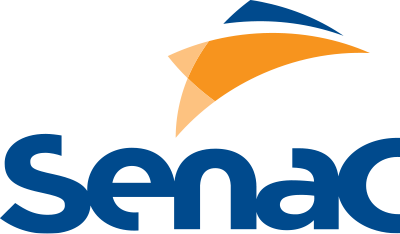


Laboratório 00 - Sistemas Distribuídos

Prof. Rafael Zulli

Neste *notebook* iremos explorar os protocolos de comunicação da Internet e iremos praticar uma técnica essencial para construção de Sistemas Distribuídos: Remote Procedures Calls (RPC). 

Leitura Recomendada:
 - Capítulo 6.4 - Redes de Computadores, Tanenbaum et al. : "Os protocolos de transporte da Internet: UDP"
 - Capítulo 6.5 - Redes de Computadores, Tanenbaum et al. : "Os protocolos de transporte da Internet: TCP"
 - Capítulo 5 - Sistemas Distribuídos Conceitos e Projeto, Coulouris et al. : Objetos distribuídos e Invocação Remota
  - Atenção: Priorizar leitura de Capítulo 5.3 - "Chamada de procedimento remoto"! 
 - Capítulo 4 - Sistemas Distríbuidos, Tanenbaum et al. : "Comunicação"
  - Priorizar: 4.2 "Chamada de procedimento remoto"



Vídeo Recomendado: 
 - https://www.youtube.com/watch?v=ud34nSwkXaw

Alunos que perderam a explicação em sala ou que gostariam de uma outra abordagem do conceito, recomendo a excelente aula do Prof. Marcus Carvalho da Universidade Federal da Paraíba sobre o assunto. 

Encontrou algum outro conteúdo que acha relevante para o debate deste laboratório? Contribua! Envie-me o link e acrescentarei aqui os recursos que acharem mais interessantes e enriquecedores.

As referências de leitura são complementos essenciais para a compreensão das arquiteturas distribuídas. Este laboratório irá cobrir de maneira prática o uso de RPCs. Abaixo, uma explicação resumida utilizando o conteúdo bibliográfico será apresentada para contextualização do tópico.


_______________________



# Sistemas Distribuídos - Protocolos de Comunicação



Como vimos na semana passada, **um sistema distribuído é um conjunto de computadores independentes que se apresenta a seus usuários como um sistema único e coerente.**

Anos atrás, no ínicio da Internet era comum encontrarmos aplicações que eram sustentadas por apenas uma máquina executando todas as funções de uma aplicação. Abaixo, foto do primeiro servidor de Sergey Brin e Larry Page para o projeto "BackRub", ou Google.

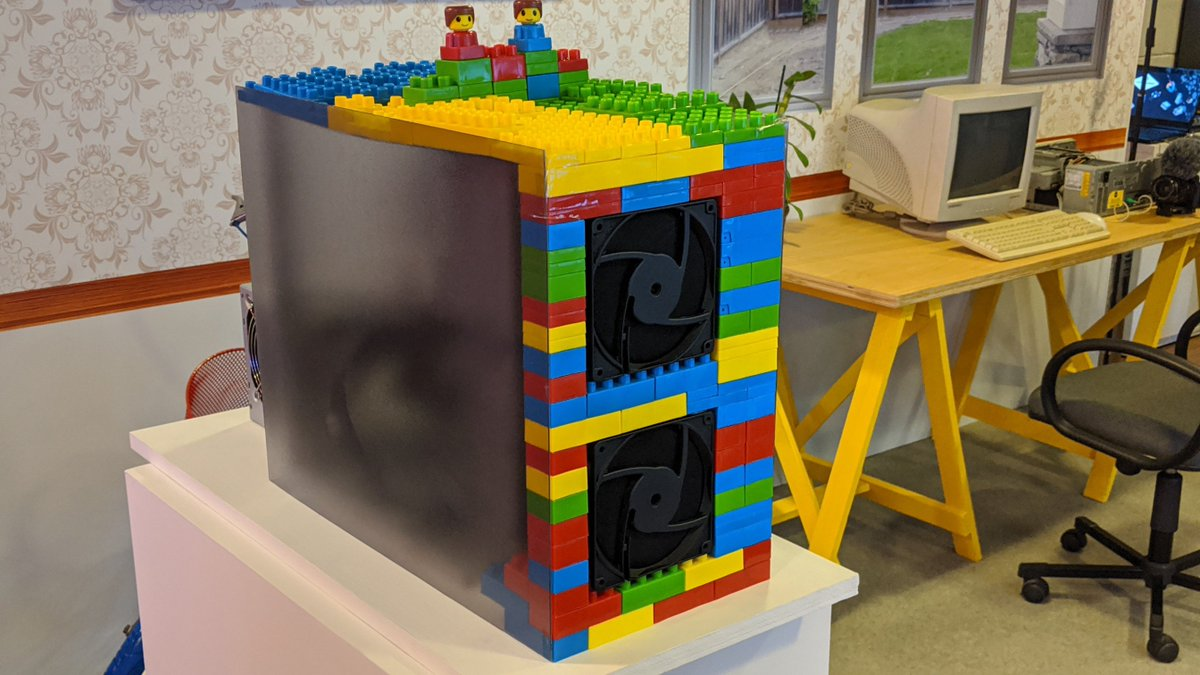





Hoje, em vias de construção da Web 3.0, é implausível imaginar que as aplicações do futuro caibam dentro de um computador feito de legos. A natureza do gigantescos data centers de hoje e a perspectiva de aplicações completamente descentralizadas com as redes blockchain é grande evidência disso. 

Como organizar múltiplas localidades, distâncias, ruídos, sinais, línguas, arquieturas e organizações em sincronicidade? 


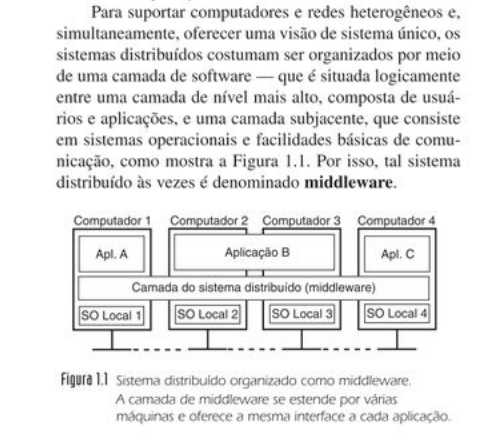


Página 2 - Sistemas Distribuídos: Princípios e Paradigmas , Tanenbaum.

Como arquitetos de sistemas todas as camadas de uma aplicação devem ser consideradas. O planejamento de um software distribuído começa muito antes da primeira linha de código. Entender como encaixar as múltiplas partes que compõem a arquitetura distribuída é essencial para o sucesso de uma solução em software. 

O desenvolvimento de aplicações middleware que tragam os recursos necessários para suportar uma solução distribuída utiliza-se dos protocolos de comuniação estuados em Redes de Computadores.

Relembrando, existem dois protocolos de transporte que performam a comunicação entre duas máquinas: TCP e UDP. O protocolo TCP é orientado a conexões e o UDP não. O protocolo UDP é permissivo e possibilita que aplicações criem protocolos de comunicação específicos utilizando suas premissas. Já o TCP é mais completo e consegue se responsabilizar por boa parte dos problemas de comunicação que podem ocorrer nas camadas inferiores (física, enlace e rede). 

Uma das formas de utilizar-se dos aspectos positivos do protocolo de transporte UDP é na criação de aplicações distribuídas que fazem uso das chamadas de procedimentos remotas, ou Remote Procedure Call (RPC).



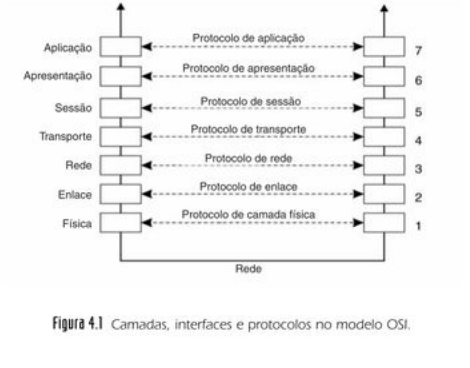

Página 70 - Sistemas Distribuídos: Princípios e Paradigmas, Tanenbaum.

# Remote Procedure Call

Leitura Sugerida - Artigo :

"Implementing Remote Procedure Calls", https://web.eecs.umich.edu/~mosharaf/Readings/RPC.pdf, Birrel e Nelson

A Imagem abaixo apresentada no artigo de Birrel e Nelson detalha o paradigma das chamadas de procedimento remota. Para facilitar a computação distribuída, esse paradigma permite a execução de código (procedimentos) remotamente. Uma máquina, "Caller Machine", envia pacotes para o servidor, "Callee Machine", contendo instruções que são interpretadas e executadas dentro do servidor. Após a execução, o resultado é enviado para a máquina cliente, "Caller Machine", e a execução da aplicação prossegue. 




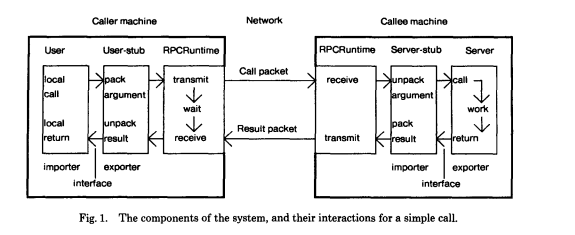

Figura: Birrel e Nelson


É importante considerar todos os problemas que emergem da execução de código remoto. Você consegue pensar em algum?

A imagem abaixo é uma versão mais didática do esquema original apresentado por Birrel e Nelson. Vincula-se no programa que é executado pela CPU do cliente uma biblioteca, o stub do cliente, que contém representações dos procedimentos do servidor dentro do espaço de endereços do cliente. Isso permite que o cliente invoque um método que, em essência, é executado pelo servidor.

Do lado do servidor, o software está vínculado a um procedimento chamado stub do servidor. Esse processo garante a transparência para o cliente, é ocultado o fato de que a chamada de procedimento do cliente até o servidor não ocorre localmente. 


1) stub do cliente é invocado. Essa chamada é local e os parâmetros são inseridos na pilha normalmente. 
2) stub do cliente reúne dados e parâmetros e efetua uma chamada ao sistema operacional para envio da mensagem
3) Após marshaling (agrupamento e organização padrozinada dos dados) a mensagem é enviada até a máquina servidor.
4) O sistema operacional passa o pacote recebido ao stub do servidor.
5) o servidor recebe os dados desagrupados e executa o procedimento pedido



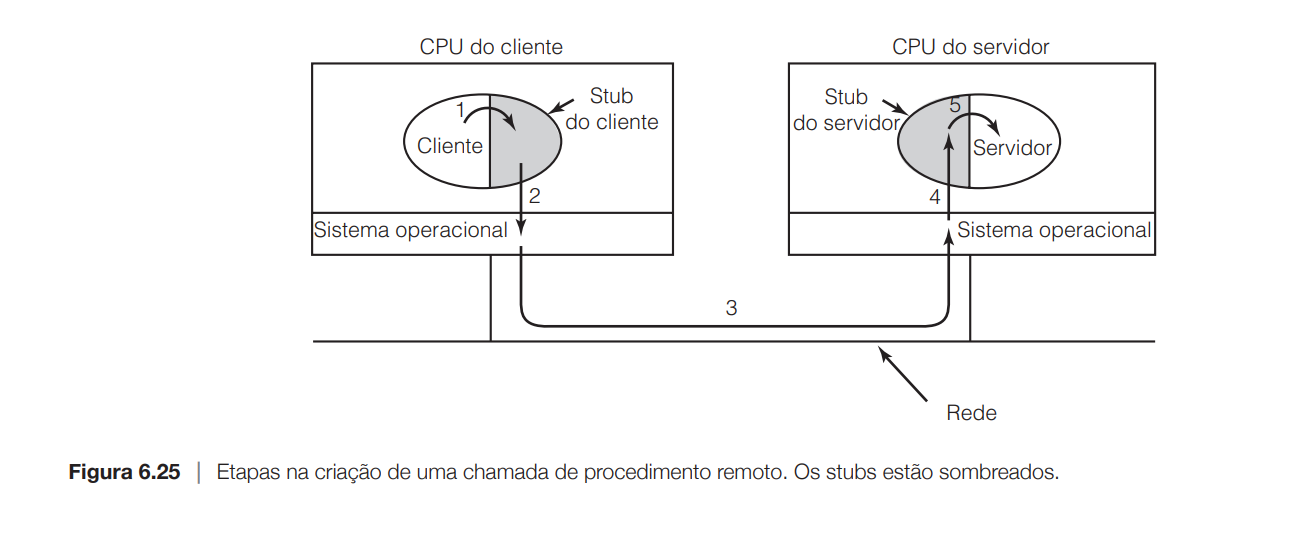

Página 342 - Redes de Computadores, Tanenbaum et al.

Questões a se considerar:

Você consegue imaginar quais problemas esse mecanismo pode sofrer? O que precisamos levar em consideração quando pensamos em sistemas que utilizem RPCs? Quais são os problemas possíveis e os riscos do uso de RPCs?

O parágrafo abaixo descreve algumas ciladas que precisamos estar atentos!


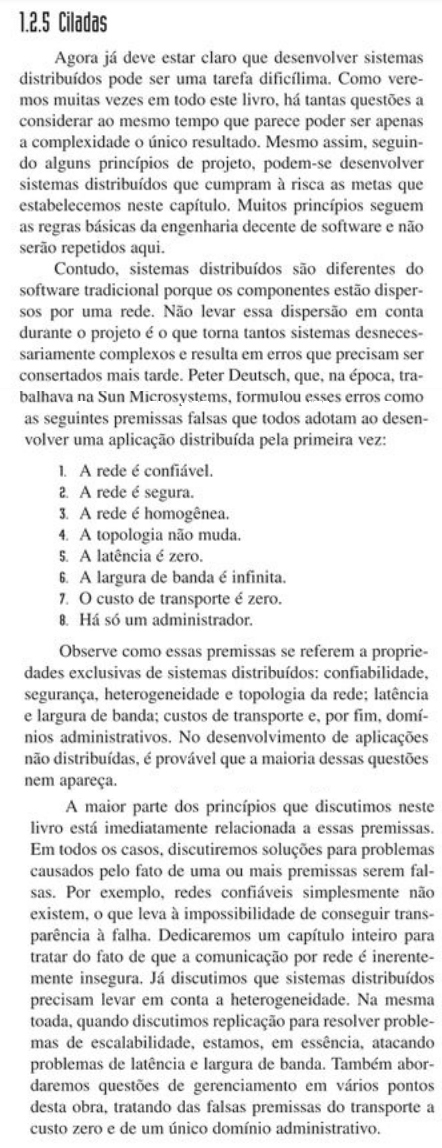

Página 9 - Sistemas Distribuídos: Princípios e Paradigmas, Tanembaum. "1.2: Ciladas"


Além disso, podemos observar na imagem abaixo outro problema presente quando pensamos na comunicação de máquinas que utilizem de camada de enlace sem fios:


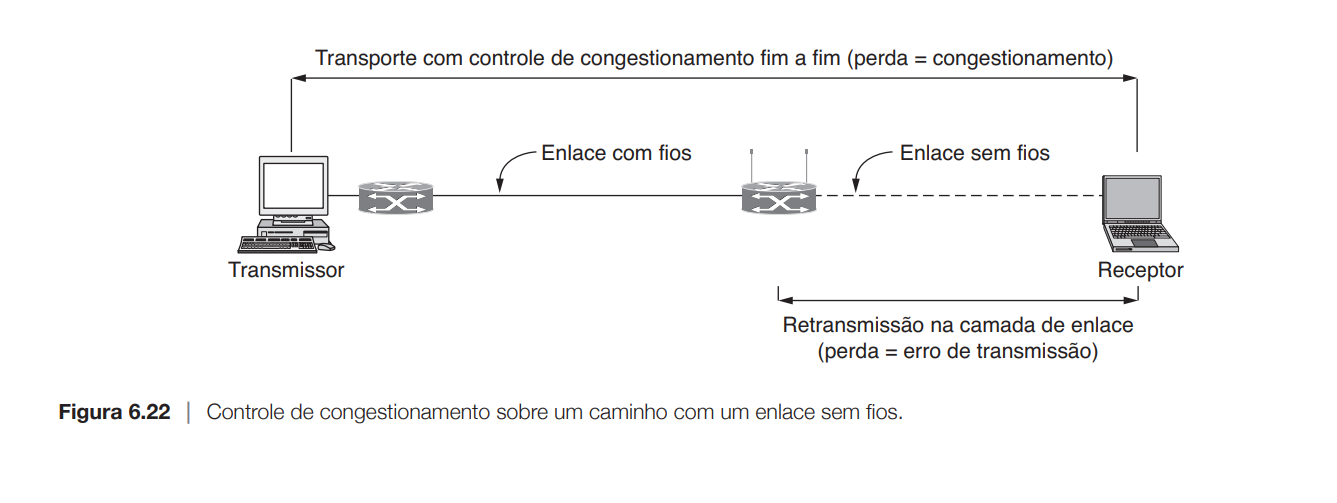

Página 339 - Redes de Computadores, Tanenbaum et al.

# Prática - RPCs em python

A seguir, iremos simular o uso de RPCs dentro deste notebook utilizando o pacote python RPyC. https://rpyc.readthedocs.io/en/latest/

RPyC, ou Remote Python Call, é uma biblioteca transparente para remote procedure calls simétricos, clustering e computação distribuída. A biblioteca utiliza-se da forma como python constrói seus objetos para superar as barreiras físicas entre processos e máquinas. Com essa biblioteca é possível manipular objetos remotos como se eles fossem locais.


Para experimentar com RPCs em python iremos utilizar o conceito de threads para a separação lógica da aplicação. Isso facilitará a visualização e absorção de conceitos em um único notebook sem a necessidade de utilizarmos técnicas externas.

## Lembrando sobre Threads

Leitura Recomendada:  
  - Capítulo 3 - "Processos" - Sistemas Distribuídos: Princípios e Paradigmas, Tanenbaum. 

Em geral, quando estamos desenvolvendo um software simples é natural organiza-lo de forma a toda sua execução ser linear. Nesse modelo, apenas um processo contendo uma thread é o responsável por gerenciar o endereçamento de memória e as instruções a serem executadas pela CPU.

Entretanto, em aplicações modernas é evidente que a execução em apenas um processo não garante a velocidade e/ou comportamento adequados para as expectativas do usuário. A programação paralela é o paradigma que soluciona essas dificuldades e demonstra quais são as formas de atingir-se aplicações com capacidades de processamento mais arrojadas.

Dentro do Sistema Operacional, de forma local, temos o uso de Threads para execução de código paralelizado. Um processo permite a manutenção de uma ou mais threads executadas paralelamente. 

Abaixo, um excerto do livro Sistemas Distribuídos: Princípios e Paradigmas que apresenta Threads. Recomendada a leitura de todo o capítulo.

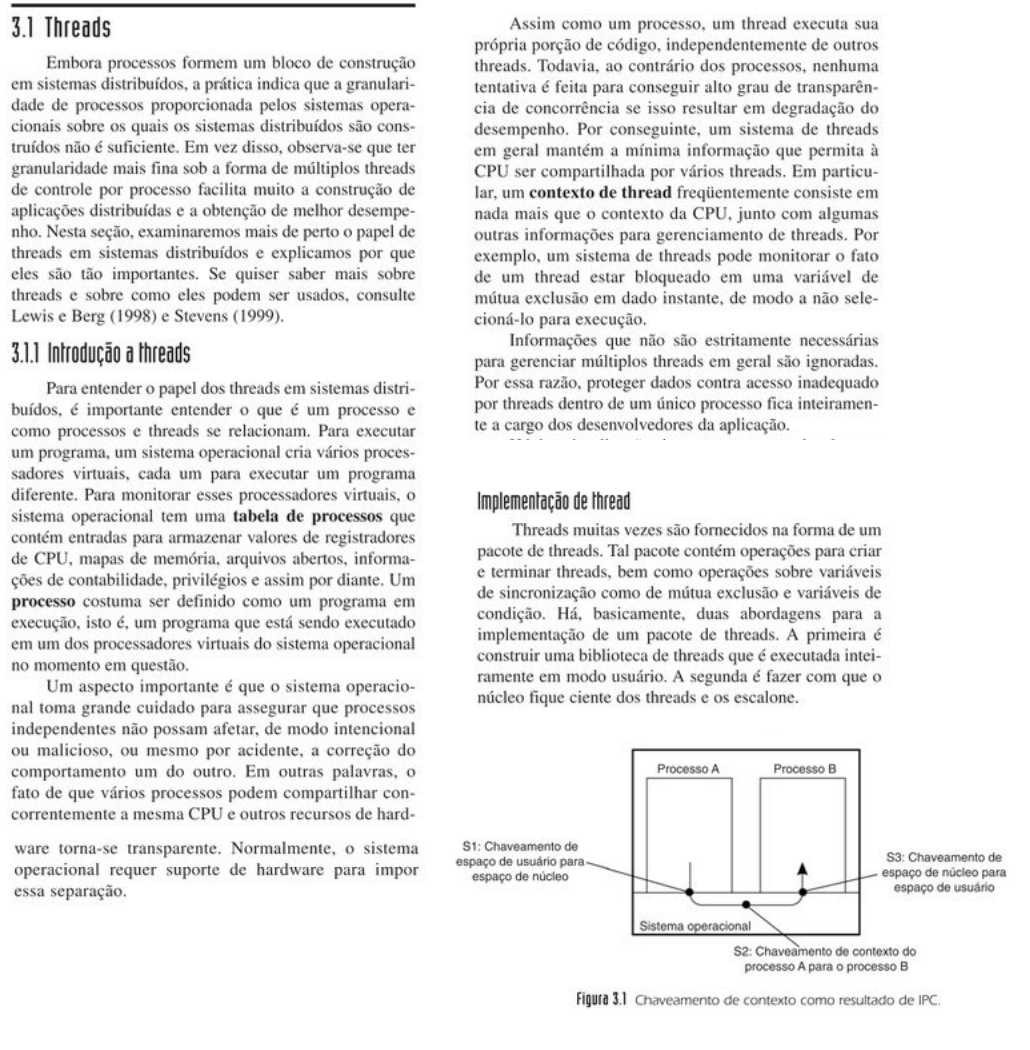

Para comunicação entre threads, os sistemas operacionais gerenciam os protocolos IPC (Inter-Process communication) que estabelecem as regras gerais de interação entre processos. 

Para processos à distância, pode-se utilizar o paradigma RPC e benificiar-se da transparência que é proporcionada ao desenvolvedor. A manipulação dos objetos ocorre à distância mas para o software a percepção é que a manipulação dos dados é local. 

Vamos iniciar nosso exemplo?

Em primeiro lugar utilizamos o gerenciador de pacotes pip para instalar o RPyC.
https://rpyc.readthedocs.io/en/latest/tutorial/tut3.html Leia a documentação caso tenha dúvidas na execução da tarefa.

In [1]:
!pip install RPyC

Em seguida, vamos criar um objeto para demonstração das capacidades do RPyC. Criamos uma classe chamada Pessoa que possui métodos e propriedades específicas.

In [2]:
class Pessoa:

  def __init__(self, nome):
    self._nome = nome

  @property
  def nome(self):
    return self._nome
  
  @nome.setter
  def nome(self, novo):
    self._nome = novo

  def falar(self):
    return "Olá! Meu nome é "+str(self.nome)
  

In [3]:
rafael = Pessoa("Rafael")
print(rafael.falar())

Olá! Meu nome é Rafael


Agora temos nosso objeto Pessoa e gostaríamos de acessá-lo e executar suas funções remotamente. Para isso vamos criar um servidor RPC que contém uma referência a classe Pessoa.


A classe ServicoRPC herda as características da classe rpyc.Service. Essa classe permite a execução de um serviço para chamadas de procedimento remotas. 

Importante: para expor funções é necessário inserir "exposed_" em seu nome.


In [4]:
import rpyc

class ServicoRPC(rpyc.Service):
    def __init__(self):
      self._pessoa = None


    def exposed_funcao_remota_criar_pessoa(self, nome):
      self._pessoa = Pessoa(nome)  
      return "Pessoa "+str(nome)+" criada."
    
    def exposed_funcao_remota_falar(self):
      if self._pessoa is None:
        return "Pessoa inexistente"
      return self._pessoa.falar


Em seguida, iniciamos o servidor RPC em uma thread para paralelização local do serviço. Com a criação desta thread é possível aguardar pela chamadas dos serviços clientes sem bloquear a execução do restante do código.

Para executar paralelamente dentro do Google Colaboratory vamos utilizar o pacote python multiprocessing para criar um processo que contenha a Thread do serviço RPC.



In [5]:
from rpyc.utils.server import ThreadedServer

def criar_servidor_rpc():
  t = ThreadedServer(ServicoRPC, port = 18861)
  t.start()

In [6]:
import multiprocessing
p = multiprocessing.Process(target=criar_servidor_rpc)
p.start()

Definimos um servidor RPC que expõe duas funções. Uma que cria um objeto na memória do servidor e outra que permite que esse objeto fale seu nome. Para acessá-las usamos a função rpyc.connect na porta que escolhemos para o servidor.

Caso realize modificações no código, lembre-se de acessar Runtime->Restart runtime. Assim a thread do servidor é destruída e é possível ocupar o endereço localhost novamente. 

In [7]:
import rpyc

#conexão ao servidor RPC
proxy = rpyc.connect('localhost', 18861)

#chamada de procedimento remoto
print(proxy.root.funcao_remota_criar_pessoa("Rafael"))

#chamada de procedimento remoto
funcao_falar = proxy.root.funcao_remota_falar()

#executar localmente função criada remotamente
funcao_falar()


Pessoa Rafael criada.


'Olá! Meu nome é Rafael'

# Desafio: 

Escreva abaixo uma nova classe que expõem procedimentos remotos. Características


Classe Mensagem
- Destinatário: objeto do tipo Pessoa
- Remetente: objeto do tipo Pessoa
- Mensagem: objeto do tipo string
- ReceberMensagens: método exposto remotamente. Recebe objeto Pessoa e retorna mensagens que são endereçadas ao usuário. 
- EnviarMensagem: cria novo objeto do tipo mensagem e insere ele na lista de mensagens a serem recebidas. 

Classe Pessoa

Reutilize a classe Pessoa apresentada anteriormente e faça as modificações necessárias.

Condição de Teste:  

- Crie 2 pessoas: A e B. 

- Envie Mensagem de A para B utilizando procedimento remoto (Conecte ao ServicoRPC e chame o método "EnviarMensagem").

- Imprima a mensagem enviada.

- Receba Mensagem utilizando procedimento remoto (Crie nova instância de conexão ao ServicoRPC e chame o método "ReceberMensagens")

- Imprima as mensagens recebidas.




In [ ]:
#Crie 2 Pessoas: A e B


#Envie Mensagem de A para B utilizando procedimento remoto


#Imprima a mensagem enviada


#Receba Mensagem utilizando Procedimento remoto (Crie nova instância de conexão)